In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt   

In [2]:
df1=pd.read_csv(r'C:\Users\bharath.g\Desktop\visualization\takehome_users.csv',encoding='ISO-8859-1')
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
df1.shape

(12000, 10)

In [4]:
df2=pd.read_csv(r'C:\Users\bharath.g\Desktop\visualization\takehome_user_engagement.csv',encoding='ISO-8859-1')
df2.shape

(207917, 3)

In [5]:
df1.rename(columns={'object_id':'user_id'},inplace=True)


In [6]:
merged_data = pd.merge(df1, df2,on='user_id',how='right')
merged_data

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,1
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-29 03:45:04,1
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-09 03:45:04,1
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-25 03:45:04,1
...,...,...,...,...,...,...,...,...,...,...,...,...
207912,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,2013-09-06 06:14:15,1
207913,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,2013-01-15 18:28:37,1
207914,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,2014-04-27 12:45:16,1
207915,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,2012-06-02 11:55:59,1


In [7]:
merged_data['date']=merged_data['time_stamp'].astype('datetime64')
merged_data['week']=merged_data['date'].dt.isocalendar().week
merged_data['year']=merged_data['date'].dt.isocalendar().year
merged_data['month']=merged_data['date'].dt.month

In [8]:
merged_data.head(2)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,visited,date,week,year,month
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,1,2014-04-22 03:53:30,17,2014,4
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,1,2013-11-15 03:45:04,46,2013,11


In [19]:
groupby_week=merged_data.groupby(['user_id','month','week','year'])['visited'].count().reset_index()
groupby_week.head(2)

,user_id,month,week,year,visited
0,1,4,17,2014,1
1,2,1,2,2014,1


In [20]:
adopted_user=groupby_week.loc[groupby_week['visited']>=3]
len(adopted_user)

32754

In [21]:
groupby_week['adopted_user']=groupby_week['visited'].apply(lambda x:1 if x>=3 else 0)
groupby_week.head(2)

,user_id,month,week,year,visited,adopted_user
0,1,4,17,2014,1,0
1,2,1,2,2014,1,0


In [23]:
df3=groupby_week[(groupby_week['visited']>=3)]
df3.head(2)

,user_id,month,week,year,visited,adopted_user
2,2,2,6,2014,3,1
17,10,1,1,2014,4,1


# Data visulaization

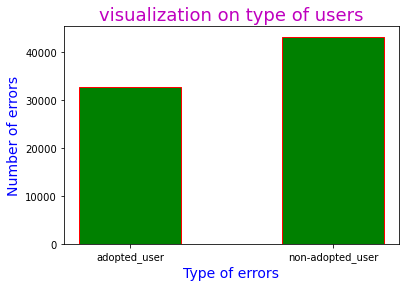

In [25]:
=[x=['adopted_user','non-adopted_user']
y=[(groupby_week.adopted_user.value_counts()[1]),(groupby_week.adopted_user.value_counts()[0])]
plt.bar(x,y,color='g',edgecolor='r',width=0.5)
plt.xlabel('Type of errors',color='blue',fontsize=14)
plt.ylabel('Number of errors',color='blue',fontsize=14)
plt.title('visualization on type of users',color='m',fontsize=18)
plt.show()

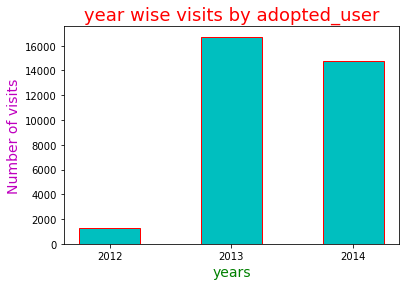

In [29]:
x=['2012','2013','2014']
q=df3.year.value_counts()
y=[q[2012],q[2013],q[2014]]
plt.bar(x,y,color='c',edgecolor='r',width=0.5)
plt.xlabel('years',color='g',fontsize=14)
plt.ylabel('Number of visits',color='m',fontsize=14)
plt.title('year wise visits by adopted_user',color='r',fontsize=18)
plt.show()

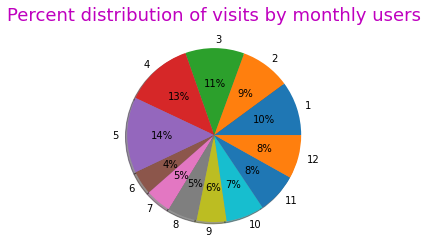

In [33]:
q=df3.groupby(['month']).size().values
p=df3.groupby(['month']).size().index
y=np.array(q)
x=np.array(p)
plt.pie(y,labels=x,autopct='%1.0f%%',shadow=True)
plt.title('Percent distribution of visits by monthly users',color='m',fontsize=18)
plt.show()

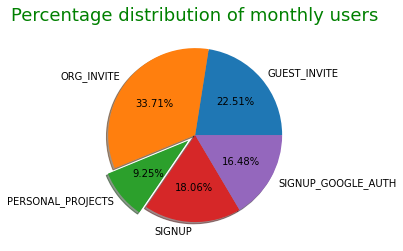

In [36]:
q=merged_data.groupby(['creation_source']).size().values
p=merged_data.groupby(['creation_source']).size().index
y=np.array(q)
x=np.array(p)
plt.pie(y,labels=x,autopct='%1.2f%%',explode=(0,0,0.1,0,0),shadow=True)
plt.title('Percentage distribution of monthly users',color='g',fontsize=18)
plt.show()

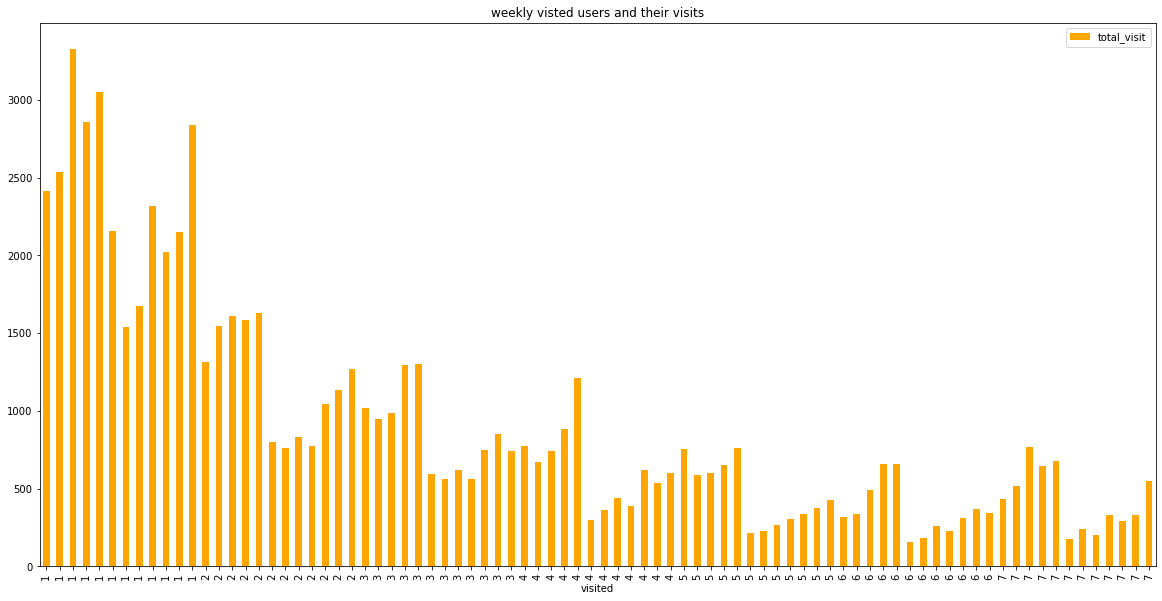

In [40]:

df5=groupby_week
df5= df5.groupby(['visited','month']).size()
df5 = df5.to_frame(name = 'total_visit').reset_index()
t= df5[df5['total_visit']>=3]
t.plot.bar(x='visited', y='total_visit', figsize=(20,10), title="weekly visted users and their visits",color='orange')
plt.show()

# Total no of adopted users are 1416 where org_invite contributes higher no of adopted users and personal projects contributes in less nos.